<div style="text-align:left;font-size:2em"><span style="font-weight:bolder;font-size:1.25em">SP2273 | Learning Portfolio</span><br><br><span style="font-weight:bold;color:darkred">Numerical Solutions (Need)</span></div>

## 1 A Bucket of water

### 1.1 Getting a feel

Text(0.5, 0, 'Time(mins)')

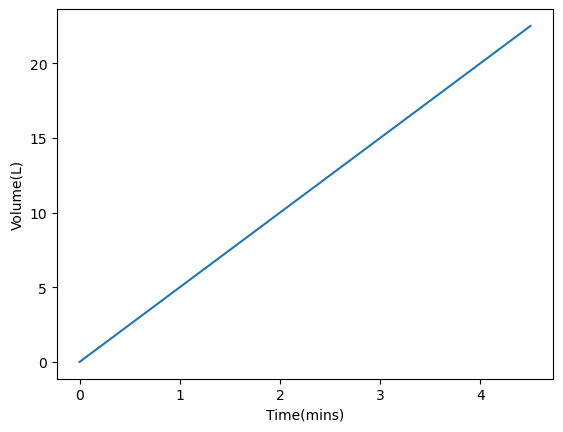

In [5]:
from matplotlib import pyplot as plt 
import numpy as np

max_time = 5    # Maximum time
dt = .5         # Time step (mins)
rate = 5        # Rate (L/min)
all_volume = [] # To keep track of all volumes
volume = 0      # Starting volume

all_time = np.arange(start = 0, stop = max_time, step = dt)
# Produces a numpy array from 0 to max_time with dt intervals. 

for time in all_time:
    all_volume.append(volume) # Record volume
    dV = rate * dt            # Calculate change in volume
    volume += dV              # Update the new volume
    
plt.plot(all_time, all_volume)
plt.ylabel('Volume(L)')
plt.xlabel('Time(mins)')

### 1.2 An overflowing bucket

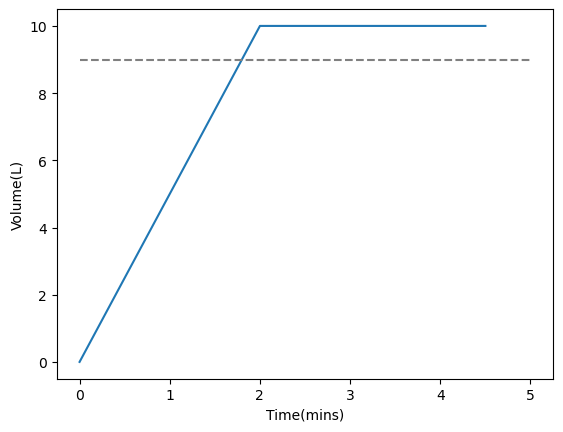

In [6]:
max_time = 5
dt = .5
rate = 5
bucket_capacity = 9 # New addition
all_volume = []
volume = 0

all_time = np.arange(start = 0, stop = max_time, step = dt)

for time in all_time:
    all_volume.append(volume)
    dV = rate * dt
    if volume <= bucket_capacity:
        volume += dV

plt.plot(all_time, all_volume)
plt.ylabel('Volume(L)')
plt.xlabel('Time(mins)')
plt.hlines(bucket_capacity, 0, max_time, colors = 'grey', ls = 'dashed')

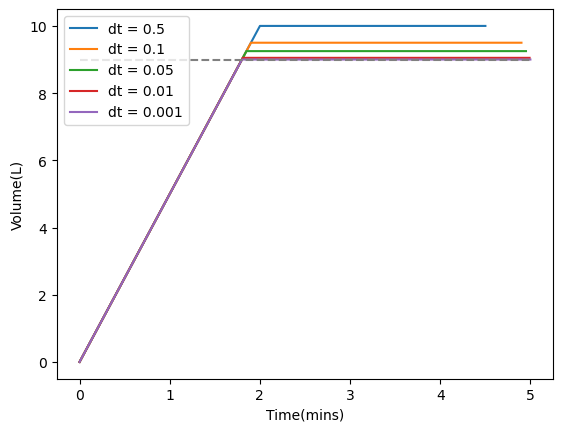

In [7]:
max_time = 5
dt = .5
rate = 5
bucket_capacity = 9

for dt in [0.5, 0.1, 0.05, 0.01, 0.001]:
    all_volume = []
    volume = 0
    all_time = np.arange(start = 0, stop = max_time, step = dt)
    
    for time in all_time:
        all_volume.append(volume)
        dV = rate * dt
        if volume <= bucket_capacity:
            volume += dV
            
    plt.plot(all_time, all_volume, label = f'dt = {dt}')
plt.ylabel('Volume(L)')
plt.xlabel('Time(mins)')
plt.hlines(bucket_capacity, 0, max_time, colors = 'grey', ls = 'dashed')
plt.legend()

### 1.3 A leaky bucket

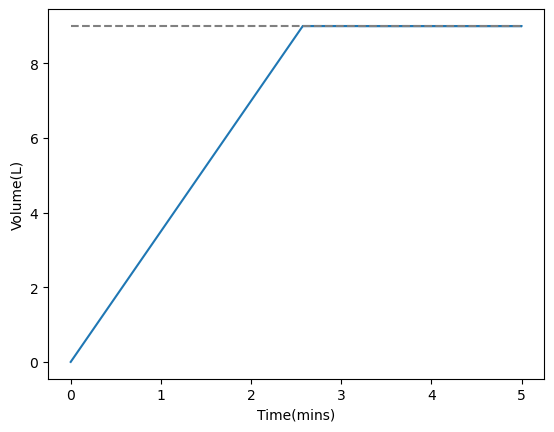

In [8]:
max_time = 5
dt = 0.001
rate = 5
leak_rate = 1.5
bucket_capacity = 9
all_volume = []
volume = 0

all_time = np.arange(start = 0, stop = max_time, step = dt)

for time in all_time:
    all_volume.append(volume)
    dV = rate * dt
    leak_volume = leak_rate * dt
    volume -= leak_volume
    
    if volume <= bucket_capacity:
        volume += dV

plt.plot(all_time, all_volume)
plt.ylabel('Volume(L)')
plt.xlabel('Time(mins)')
plt.hlines(bucket_capacity, 0, max_time, colors = 'grey', ls = 'dashed')

### 1.4 Let’s turn off the tap

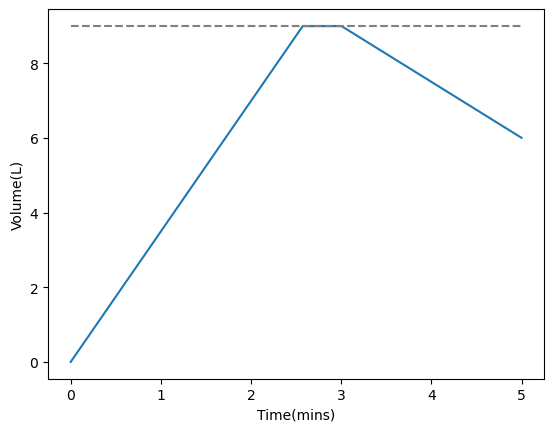

In [9]:
tap_off_time = 3 # New addition
max_time = 5                     
dt = .001                        
rate = 5                         
leak_rate = 1.5                  
bucket_capacity = 9              
all_volume = []                  
volume = 0                       

all_time = np.arange(start=0, stop=max_time, step=dt)

for time in all_time:
    all_volume.append(volume)
    dV = rate * dt

    leak_volume = leak_rate * dt
    volume -= leak_volume

    if (volume <= bucket_capacity) and (time < tap_off_time):
        volume += dV             

plt.plot(all_time, all_volume)
plt.ylabel('Volume(L)')
plt.xlabel('Time(mins)')
plt.hlines(bucket_capacity, 0, max_time, colors='grey', ls='dashed')

### Using while

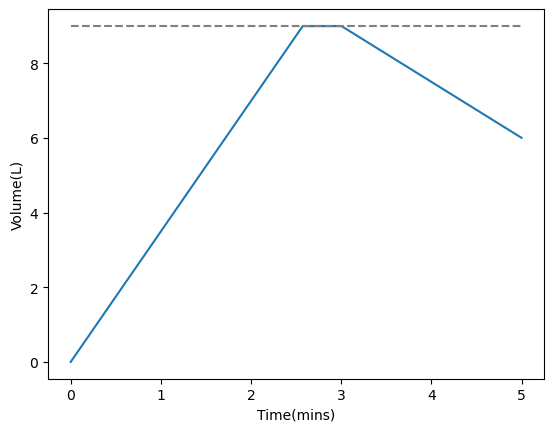

In [10]:
tap_off_time = 3
max_time = 5
dt = .001
rate = 5
leak_rate = 1.5
bucket_capacity = 9
all_volume = []
all_time = []
volume = 0
time = 0

while time <= max_time:
    all_time.append(time)
    all_volume.append(volume)
    dV = rate * dt
    
    leak_volume = leak_rate * dt
    volume -= leak_volume
    
    if (volume <= bucket_capacity) and (time < tap_off_time):
        volume += dV
        
    time += dt
    
plt.plot(all_time, all_volume)
plt.ylabel('Volume(L)')
plt.xlabel('Time(mins)')
plt.hlines(bucket_capacity, 0, max_time, colors = 'grey', ls = 'dashed')

### 1.5 A quick summary

In [ ]:
# Establish a relationship that connects the changes of the variables.
# Pick a starting value.
# Take a step, and calculate the changes.
# Update the variables.
# Keep on going until you have the desired number of points.
# If you want to improve accuracy, take smaller steps. 

### 1.6 We just solved a differential equation!

## 2 Simulating Radioactivity

### 2.1 Introduction

### 2.2 Approximating the differential equation

### 2.3 Getting a feel

In [ ]:

# Your code here


### 2.4 Let’s write some code

Text(0.5, 0, 'Time(Millions of years)')

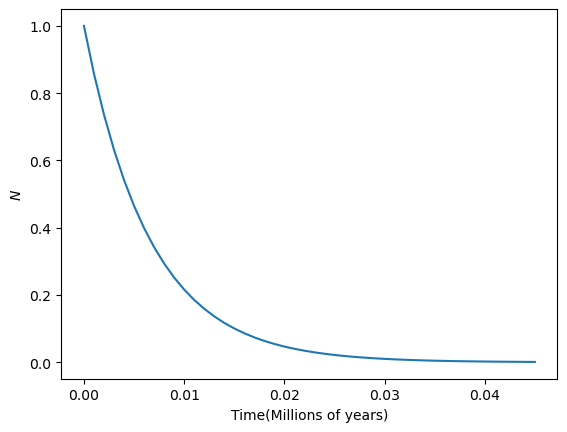

In [11]:
decay_constant = 142 # For 85 Rb (per Myr)
stop_fraction = 1E-3 # stop when the sample has shrunk to this fraction.

N0 = 1 # In billions
dt = .001
time, N = 0, N0

all_N, all_time = [], []
while True:
    all_time.append(time)
    all_N.append(N)
    dN = -decay_constant * N * dt
    N += dN # Is + because dN itself is already negative. 
    
    if N < N0 * stop_fraction:
        break
    time += dt

plt.plot(all_time, all_N)
plt.ylabel('$N$')
plt.xlabel('Time(Millions of years)')


### 2.5 Some things to note about the code

In [ ]:
# True condiiton will induce an infinity loop until you purposely break 
# out of it with break
# stop_fraction was the condition to break in this case.

### 2.6 A quick summary

In [ ]:
# Rewrite the equation in an approximate form that connects the change 
# of one variable to another 

# Pick starting values for the variables
# Step the control variable and calculate the corresponding changes
# in the other variables.

# Update the variables.

## Exercise 1 :  A more realistic leak

In [ ]:
# Essential Information
tap_off_time = 3 # Time limit
max_time = 5 
dt = .001 
rate = 5 # Rate increase of 5L/min
bucket_capacity = 9 

# Leak information
h = volume / 700
leak_speed = np.sqrt(2 * 9.8 * 10 * h) # Convert to cm/s2
leak_rate = 1 * leak_speed

all_volume, all_time = [], []
volume, time = 0, 0

while time <= max_time:
    all_time.append(time)
    all_volume.append(volume)
    dV = rate * dt
    leak_volume = leak_rate * dt
    volume -= leak_volume
    
    if (volume <= bucket_capacity) and (time < tap_off_time):
        volume += dV 
    time += dt
    
plt.plot(all_time, all_volume)
plt.ylabel('Volume(L)')
plt.xlabel('Time(mins)')


/var/folders/xl/66wk0yy56y5g6zdx76s3lt900000gn/T/ipykernel_21177/197245412.py:13: RuntimeWarning: invalid value encountered in sqrt
  leak_speed = 60 * np.sqrt(2 * 9.8 * 100 * h) # Convert cm/min


Text(0.5, 0, 'Time(mins)')

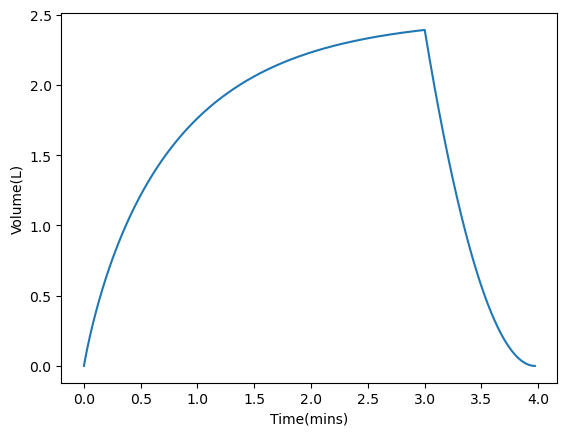

In [50]:
# Essential Information
tap_off_time = 3 # min
max_time = 5 # min
dt = .001 # min
rate = 5000 # Rate increase of 5000cm^3/min
bucket_capacity = 9000 # cm^3
bucket_area = 700 # cm^2
bucket_hole = 1 # cm^2

# Leak information
def leak_rate(volume):
    h = volume / bucket_area # cm
    leak_speed = 60 * np.sqrt(2 * 9.8 * 100 * h) # Convert cm/min
    rate_leak = bucket_hole * leak_speed
    return rate_leak # cm^3/min

all_volume, all_time = [], []
volume, time = 0, 0

while time <= max_time:
    all_time.append(time)
    all_volume.append(volume)
    dV = rate * dt
    leak_volume = leak_rate(volume) * dt
    volume -= leak_volume
    if (volume <= bucket_capacity) and (time < tap_off_time):
        volume += dV
    time += dt 
    
all_volume = [1/1000 * volume for volume in all_volume] 
# Convert all back to L

plt.plot(all_time, all_volume)
plt.ylabel('Volume(L)')
plt.xlabel('Time(mins)')
